# Root Cause Analysis using Statistical Approach of Safety Accidents in Container Terminal Operations

## Project Background

This project is a part of the project requirement for my Bachelor's degree in Industrial Engineering, and it represents the culmination of my final year of studies.

The shipping industry is regarded as one of the most hazardous sectors due to the elevated occupational risks associated with its intricate operations, as identified by the International Maritime Organization. Furthermore, it is essential to enhance safety standards by reducing the number of safety incidents at the container terminal. Nevertheless, attempting to address all potential root causes of accidents is not a financially viable or realistic solution. Consequently, to reduce the incidence of safety accidents, which are predominantly recurring incidents, it is essential to conduct a statistical analysis of the data set before drawing any conclusions.

*Note: the data set used in this project has already been altered by omitting sensitive data with the purpose of protecting sensitive company information*

## 1. Ask
The primary objective here is to identify which root cause that is statistically significant in materializing the recurring accidents in container terminal operations.

## 2. Prepare

First, load the required libraries and dataset as a dataframe

In [153]:
# Import all of the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Load the .csv files as the dataframe
accidentData = pd.read_csv('operational-accident-terminal-altered.csv', delimiter=';')

df = pd.DataFrame(accidentData)

df.shape

(281, 9)

It is identified that there are 281 data points and 15 columns to be analyzed.

In [154]:
# Quick look
df.head()

,No,Date,Shift,Place of Occurrence,Root Cause,Accident Category,Accident Type,Detailed Root Cause,Error Types
0,1,"Tuesday, 07 January 2020",I,Vessel,Man,Work Accident,Worker hits while working,Undefined,NaN
1,2,"Tuesday, 07 January 2020",I,Vessel,Method,Stevedoring Occurrences,Loading and Unloading Accident,Twist lock still locked while hoisting,Lapse and Mistake
2,3,"Wednesday, 08 January 2020",III,CY,Man,Cargodoring Occurrences,Traffic Collision,NaN,Slip
3,4,"Thursday, 16 January 2020",I,CY,Machine,Cargodoring Occurrences,Equipment Malfunction,NaN,NaN
4,5,"Saturday, 18 January 2020",III,CY,Man,Cargodoring Occurrences,Traffic Collision,NaN,Lapse and Mistake


Next, check the data types of all columns

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No                   281 non-null    int64 
 1   Date                 281 non-null    object
 2   Shift                281 non-null    object
 3   Place of Occurrence  281 non-null    object
 4   Root Cause           281 non-null    object
 5   Accident Category    281 non-null    object
 6   Accident Type        281 non-null    object
 7   Detailed Root Cause  13 non-null     object
 8   Error Types          7 non-null      object
dtypes: int64(1), object(8)
memory usage: 19.9+ KB


## 3. Process
There are several column that should be changed before EDA can be conducted:

1. Change the `Tanggal` to datetime64 because it is date.
2. Drop `LK`, `Detail Kasus Kejadian`, `Peralatan`, `Dampak Kecelakaan`, `Error Types`, and `Keterangan` as we do not need those columns for EDA.

Missing values for several columns can be ignored as the data would be dropped.

In [156]:
# Simplify column names
df.columns = df.columns.str.replace(' ', '_')

# Drop the columns with the simplified names
columns_to_drop = (['Error_Types', 'Detailed_Root_Cause'])

# Ensure columns exist before dropping
existing_columns_to_drop = [col for col in columns_to_drop
                            if col in df.columns]

df = df.drop(existing_columns_to_drop, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No                   281 non-null    int64 
 1   Date                 281 non-null    object
 2   Shift                281 non-null    object
 3   Place_of_Occurrence  281 non-null    object
 4   Root_Cause           281 non-null    object
 5   Accident_Category    281 non-null    object
 6   Accident_Type        281 non-null    object
dtypes: int64(1), object(6)
memory usage: 15.5+ KB


Check for duplicated values and delete duplicates`

In [157]:
df.duplicated().sum()

0

As there are no duplicates identified in the data, we can advance into modifying the datatype.

In [159]:
# Convert datatype into datettime64
df["Date"] = pd.to_datetime(df["Date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   No                   281 non-null    int64         
 1   Date                 281 non-null    datetime64[ns]
 2   Shift                281 non-null    object        
 3   Place_of_Occurrence  281 non-null    object        
 4   Root_Cause           281 non-null    object        
 5   Accident_Category    281 non-null    object        
 6   Accident_Type        281 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 15.5+ KB


As the data is prepared by cleaning from redundant columns, we can continue straight to our analysis.

## 4. Analyze

This phase, we are going to process our dataset using various statistical analysis as a part of our EDA.

### 4.1 Root Cause Analysis

#### 4.1.1 Pareto Analysis
The main objective of root cause analysis is analyzing and determining the main reason why the problem happened. In this context, the main problem is accident occurrences. Therefore, what is the main reason that accident keep occurring in the operations.

The first analysis employing Pareto chart to understand which or what are the most significant root causes in creating the accident occurrences.

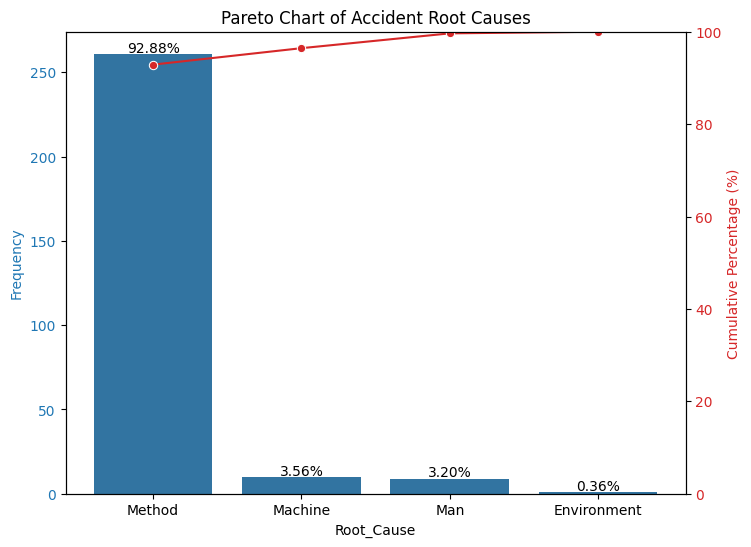

In [ ]:
# Count the frequency of each root cause
root_cause_counts = df['Root_Cause'].value_counts().reset_index()
root_cause_counts.columns = ['Root_Cause', 'Frequency']

# Sort DataFrame by Frequency in descending order
root_cause_counts = root_cause_counts.sort_values(by='Frequency', ascending=False)

# Calculate Cummulative Percentage
root_cause_counts['Cumulative_Percentage'] = (root_cause_counts['Frequency'].cumsum() / root_cause_counts['Frequency'].sum()) * 100

fig, ax1 = plt.subplots(figsize=(8,6))

barplot = sns.barplot(x='Root_Cause', y='Frequency', data=root_cause_counts, color='tab:blue', ax=ax1)
for index, row in root_cause_counts.iterrows():
    percentage = f"{(row['Frequency'] / root_cause_counts['Frequency'].sum() * 100):.2f}%"
    ax1.text(index, row['Frequency'] + 1, percentage, color='black', ha="center")

ax1.set_ylabel('Frequency', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
sns.lineplot(x='Root_Cause', y='Cumulative_Percentage', data=root_cause_counts, color='tab:red', marker='o', sort=False, ax=ax2)
ax2.set_ylabel('Cumulative Percentage (%)', color='tab:red')
ax2.set_ylim(0, 100)
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Pareto Chart of Accident Root Causes')
plt.xticks(rotation=45)
plt.show()

The Pareto chart indicates that "Method" was the primary contributing factor in 92.88% of accidents. It can be reasonably deduced from the data that further analysis of reduction should be focused on "Method."

#### 4.1.2 Distribution of Root Causes in Various Operational Categories


#### 4.1.4 Correlation Analysis

Further observations and readings indicate that there are various variables that can lead to errors in methods when executing tasks. This can result in an accident. In this section of the EDA, we conduct a correlation analysis between the variables `Place_of_Occurrence`, `Shift`, and `Root_Cause` using heatmap visualization and a chi-square test of association.

##### 1. Place of Accidents vs. Root Cause

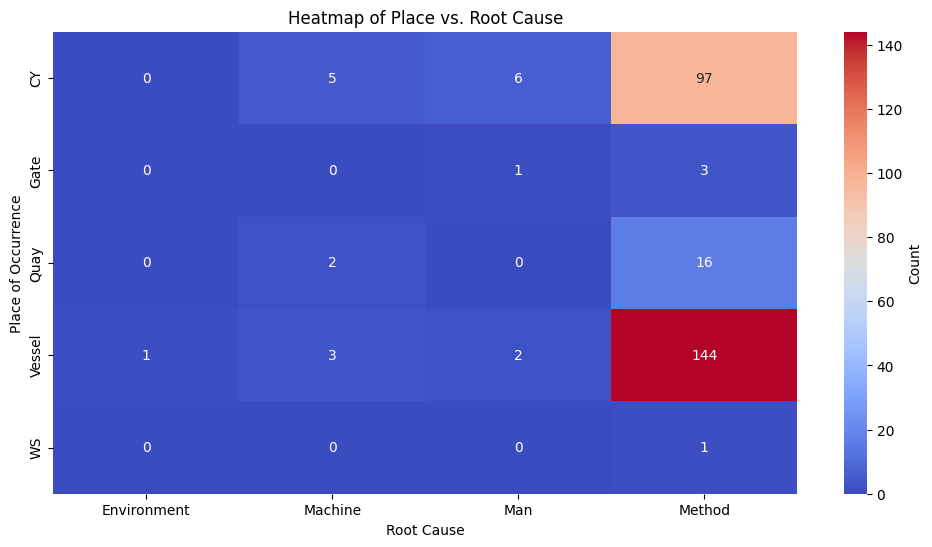

In [ ]:
# Create pivot table for the visualization consisting the respective columns/variables
pivot_table_pnr = df.pivot_table(index='Place_of_Occurrence',
                             columns=['Root_Cause'],
                             aggfunc='size',
                             fill_value=0)

# Create the Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table_pnr, annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Count'})

plt.title('Heatmap of Place vs. Root Cause')
plt.xlabel('Root Cause')
plt.ylabel('Place of Occurrence')
plt.tight_layout

plt.show()

The heatmap suggest that there is a specific process/method/execution on the vessel and container yard which contributes to a higher likelihood of accidents. However, we are unable to draw any conclusion yet as we haven't conducted any statistical test to determine if there is an association between `Place of Occurrence` and `Root Cause`.

To test its significance, a chi-square test is conducted to test the hyptoheses.
- H0 = There is no association between `Place of Occurrence` and `Root Cause` of accidents.
- H1 = There is association between `Place of Occurrence` and `Root Cause` of accidents.

In [ ]:
# Create contingency table for the respective columns/variables
contingency_table_place_pnr = pd.crosstab(df['Place_of_Occurrence'], df['Root_Cause'])

chi2_pnr, p_pnr, dof_pnr, ex_pnr = stats.chi2_contingency(contingency_table_place_pnr)

print("Chi-square Test: ", chi2_pnr)
print("P-value: ", p_pnr)
print("Degrees of Freedom: ", dof_pnr)

Chi-square Test:  15.794417056903647
P-value:  0.20083462953878953
Degrees of Freedom:  12


As the p-value result of the chi-square test is greater than alpha = 0.05, the result implies that **we fail to reject the null hypothesis (H0) and it cannot be concluded that there is a statistically significant relationship between `Place of Occurrence` and `Root Cause`** and further analysis is necessary to be able to determine if certain locations are more prone to specific types of accidents.

##### 2. Root cause vs Shift

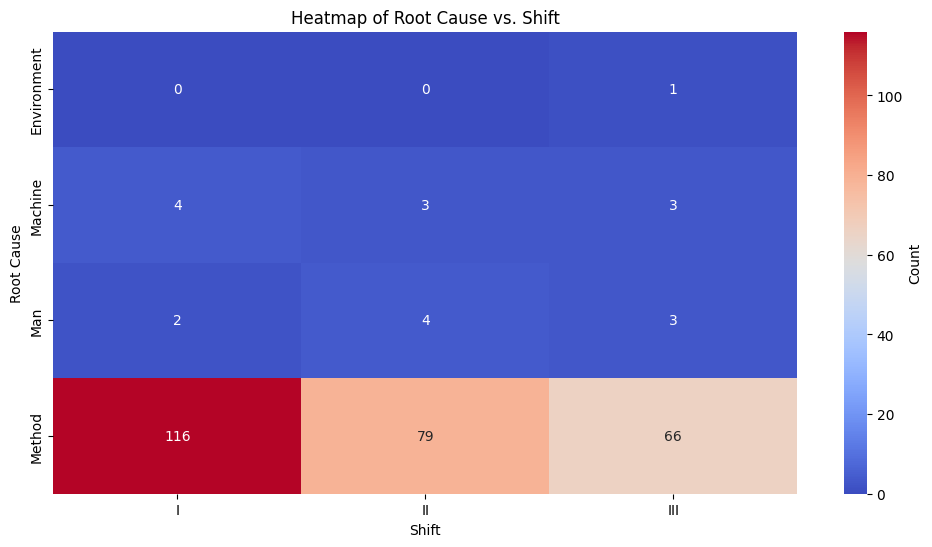

In [ ]:
# Create pivot table for the visualization consisting the respective columns/variables
pivot_table_rns = df.pivot_table(index='Root_Cause',
                                 columns=['Shift'],
                                 aggfunc='size',
                                 fill_value=0)

# Create the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table_rns, annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Count'})

plt.title('Heatmap of Root Cause vs. Shift')
plt.xlabel('Shift')
plt.ylabel('Root Cause')
plt.tight_layout

plt.show()

The heatmap implies that the frequency of accidents may be influenced by the time of day or specific operational, execution, or methodological issues that contributes to the accident occurrences. The gradient of hue in Shift I - III suggest that the frequency of accidents may be influenced by the time of day or specific operational factors associated with each shift. Nevertheless, this correlation does not imply the causation as the cause of the majority of the accidents occur during the first shift is that there are generally more loading and unloading operations during this period, as most vessel arrive at the container terminal in the first shift, to be specific, at 08.00 am to 04.00 pm.

To test its significance, a Chi-square test of association is conducted with these hypotheses:
- H0 = There is no assocation between `Root Cause` and `Shift` of accidents.
- H1 = There is an association between `Root Cause` and `Shift` of accidents.

In [ ]:
# Create contingency table for the respective columns/variables
contingency_table_place_rns = pd.crosstab(df['Root_Cause'], df['Shift'])

chi2_rns, p_rns, dof_rns, ex_rns = stats.chi2_contingency(contingency_table_place_rns)

print("Chi-square Test: ", chi2_rns)
print("P-value: ", p_rns)
print("Degrees of Freedom: ", dof_rns)

Chi-square Test:  4.742644912352864
P-value:  0.5772188368638314
Degrees of Freedom:  6


As the p-value of the Chi-square result is approximately at 0.577, which is greater than the alpha = 0.05. This means that **there is not enough evidence to reject the null hypothesis and it cannot be concluded that there is a statistically significant relationship between `Root Cause` and `Shift` of accidents**. Furthermore, thsi implies that the time of day may not significantly influence the type of accidents that occur. However, further analysis should be conducted to confirm this findings.

##### 3. Place of Accidents vs. Shift

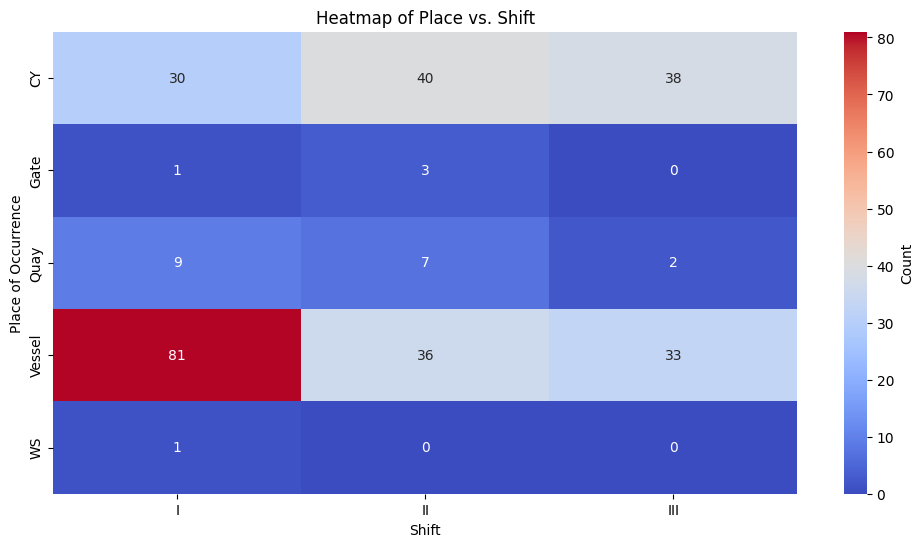

In [ ]:
# Create pivot table for the visualization consisting the respective columns/variables
pivot_table_pns = df.pivot_table(index='Place_of_Occurrence',
                             columns=['Shift'],
                             aggfunc='size',
                             fill_value=0)

# Create the Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table_pns, annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Count'})

plt.title('Heatmap of Place vs. Shift')
plt.xlabel('Shift')
plt.ylabel('Place of Occurrence')
plt.tight_layout

plt.show()

The heatmap indicates that majority of accidents occur at `Vessel` and `Container Yard` and distributed across all shifts. It is also evident that `Shift I` consistently have accidents distributed over all places of occurrence. This trend suggest that `Shift I` may have an association with increased operational risks or vulnerabilities which leads to a higher count of accidents compared to the other shifts. However, this correlation is not the causation as previously stated that most of operations occurs at shift I due to most vessels coming at the time window of the first shift, which is 08.00 am to 04.00 pm.

To test its significance, a Chi-square test of association is conducted with these hypotheses:
- H0 = There is no association between `Root Cause` and `Shift` of accidents.
- H1 = There is an association between `Root Cause` and `Shift` of accidents.

In [ ]:
# Create contingency table for the visualization consisting the respective columns/variables
contingency_table_place_pns = pd.crosstab(df['Place_of_Occurrence'], df['Shift'])

chi2_pns, p_pns, dof_pns, ex_pns = stats.chi2_contingency(contingency_table_place_pns)

print("Chi-square Test: ", chi2_pns)
print("P-value: ", p_pns)
print("Degrees of Freedom: ", dof_pns)


Chi-square Test:  25.335141033742605
P-value:  0.0013637058020407945
Degrees of Freedom:  8


As the p-value of the result is approximately at 0.001 which is less than the alpha = 0.05, there is a strong evidence to reject the null hypothesis and it can be concluded that **there is a statistically significant relationship between `Place of Occurrence` and `Shift` based on the Chi-square test of association.**

However, further analysis still needs to be conducted with the goal to see wheter the model that consists of `Place of Occurrence`, `Shift`, and `Root Cause` have influences on the number of accident occurrence itself.

### Poisson Regression

Poisson regression is used to analyze the number of accidents occuring within fixed intervals of approximately 2.5 years. **The objective is to identify which categorical predictors have a significant impact on the number of accidents**. In this regresion model, the dependent variable is the `count of accidents`, while the predictor variables are `Place of Occurrence`, `Shift`, and `Root Cause`. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Index                281 non-null    int64         
 1   LK_                  281 non-null    int64         
 2   Tanggal              281 non-null    datetime64[ns]
 3   Shift                281 non-null    object        
 4   Group                281 non-null    object        
 5   Place_of_Occurrence  281 non-null    object        
 6   Root_Cause_(5M)      281 non-null    object        
 7   Accident_Category    281 non-null    object        
 8   Accident_Type        281 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 19.9+ KB


In [ ]:
agg_df = df.groupby(['Shift', 'Place_of_Occurrence', 'Root_Cause']).size().reset_index(name='Accident_Count')

# Fit Poisson regresion model
formula = "Accident_Count ~ C(Shift) + C(Place_of_Occurrence) + C(Root_Cause)"
model = sm.GLM.from_formula(formula, data=agg_df, family=sm.families.Poisson()).fit()

# Show model summary
print("\nModel Summary: ", model.summary())


Model Summary:                   Generalized Linear Model Regression Results                  
Dep. Variable:         Accident_Count   No. Observations:                   26
Model:                            GLM   Df Residuals:                       16
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.277
Date:                Tue, 25 Jun 2024   Deviance:                       33.932
Time:                        23:59:49   Pearson chi2:                     42.6
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

From the regression result, we can conclude that `Method` shows a substantial increase in occurrence, with a coefficient of approximately 3.632 and high statistical significance. **This highlights a method-related issues as a significant contributor to accident occurrences**.

In [160]:
# Calculate the R-squared and R-squared (adj)
y = agg_df['Accident_Count']
y_pred = model.mu
sst = np.sum((y - np.mean(y))**2)
sse = np.sum((y - y_pred)**2)
rsquared = 1 - sse/sst
num_params = len(model.params)
rsquared_adj  =1 - (1 - rsquared) * ((len(df) - 1) / (len(df)- num_params - 1))

# Print the r-sq and r-sq(adj)
print("R-Sq: ", rsquared)
print("R-Sq(adj): ", rsquared_adj)

R-Sq:  0.9119215638619432
R-Sq(adj):  0.9086593995605338


The R-squared and R-squared(adjusted) values demonstrate that 91.2% of the variability in the response group is explained by the predictor group. The R-squared (adjusted) value demonstrates that when the model is fitted and adjusted to another distribution, 91% of the variability is explained by the predictor group.

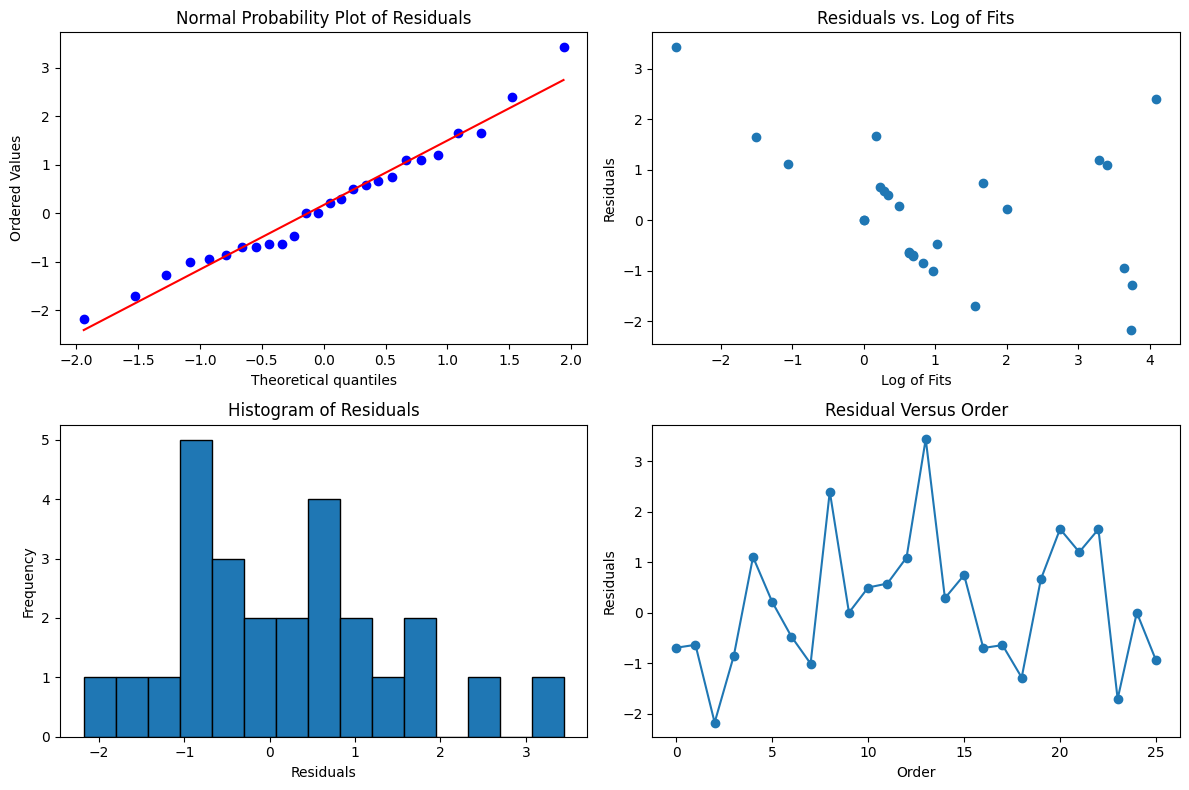

In [ ]:
# Diagnostic plots
residuals = model.resid_pearson

# Normal probability plot of residual
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Probability Plot of Residuals")

# Residual vs Log of Fits
plt.subplot(2,2,2)
plt.scatter(np.log(model.mu), residuals)
plt.title("Residuals vs. Log of Fits")
plt.xlabel("Log of Fits")
plt.ylabel("Residuals")

# Histogram of residuals
plt.subplot(2,2,3)
plt.hist(residuals, bins=15, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Residuals versus order
plt.subplot(2,2,4)
plt.plot(range(len(residuals)), residuals, marker='o', linestyle='-')
plt.title("Residual Versus Order")
plt.xlabel("Order")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

**Interpretation of Residual Plot**

1. **Normal Probability Plot** - implication of a positive correlation, although there are some data plots that is further away from the line which indicates that the existence of outliers in the data set.
2. **Residual vs. Log of Fits** - data set is consistent across the range of predicted values due to the residual is randomly scattered around the horizontal zero line and several of the data points being close to each other.
3. **Residual Histogram** - the data is close to a Poisson distribution due to the histogram showing a slightly positive skewness.
4. **Residual vs. Order** - no trends or pattern in the data plots across observations.

## 6. Insights
##### 1. In conclusion, method can be considered as the most significant root cause in accident occurrence.
##### 2. Further analysis to mitigate method related issues in the operational is crucial to be conducted.
##### 3. Enhancing safety culture is crucial to optimize the opeartional efficiency of the container terminal as it decreases down time.